# Ideas
- would be good to get going in leaflet 

In [1]:
#from helper_functions import *
from osgeo import gdal
gdal.UseExceptions()
import numpy as np
import pandas as pd
import rioxarray
import matplotlib.pyplot as plt

#from within the project
from tif_to_nc import tif_to_nc
from tif_to_nc import tif_to_nc_without_replacing_zeros

In [2]:
#set paths
input_tif_5070_path = r"input_data/1992_2015/1993.tif"
template_path = r"template_data/dust_emissions_05.20210906.nc"
scaling_factor = 0.01

# take peace out of input file
- get slice
- take measurements
    - measure total area
    - measure salt

<xarray.DataArray (band: 1, y: 3133, x: 4836)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -2.493e+06 -2.492e+06 ... 2.341e+06 2.342e+06
  * y            (y) float64 3.31e+06 3.309e+06 ... 1.788e+05 1.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    _FillValue:          -3.4028235e+38
    scale_factor:        1.0
    add_offset:          0.0

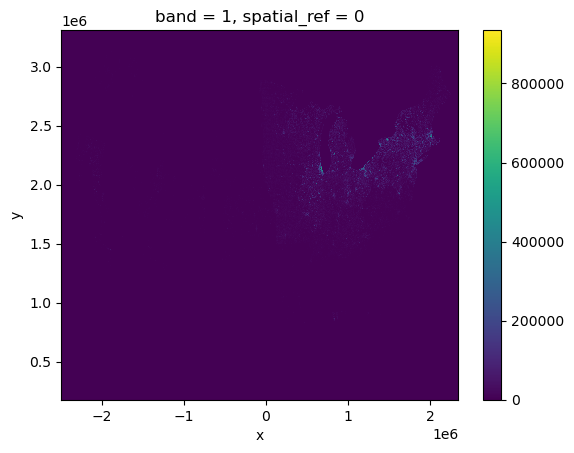

In [3]:
# open file
xr_array = rioxarray.open_rasterio(input_tif_5070_path)
xr_array = xr_array.where(xr_array != xr_array._FillValue,0) #tiff files have a _FillValue to hold none values
display(xr_array)
xr_array.plot() #plotting makes things crash - It only crashes when I get in trouble for using to much recourses on interactive nodes

[      0  500000 1000000 1500000 2000000 2500000 3000000]


<xarray.DataArray (band: 1, y: 3133, x: 4836)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -2.493e+06 -2.492e+06 ... 2.341e+06 2.342e+06
  * y            (y) float64 3.31e+06 3.309e+06 ... 1.788e+05 1.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    _FillValue:          -3.4028235e+38
    scale_factor:        1.0
    add_offset:          0.0

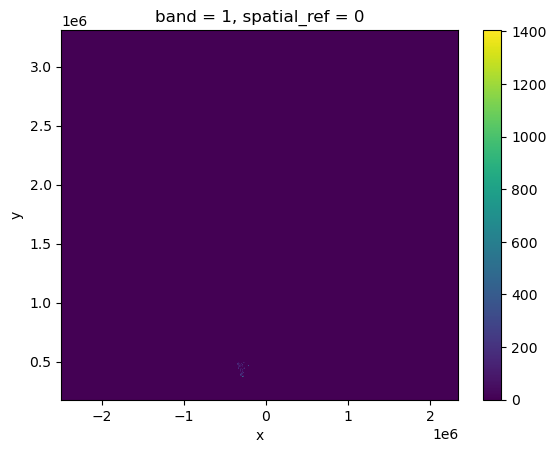

In [4]:
# slice input file in memory (I'm thinking at y values)
slices = np.arange(0, int(3.5e6), int(0.5e6))
print(slices)
xr_array = xr_array.where(xr_array.y>slices[0]).where(xr_array.y<slices[1])
xr_array = xr_array.where(xr_array.notnull(),0) #tiff files have a _FillValue to hold none values
display(xr_array)
xr_array.plot() # I cannot plot when I am using the interactive node or it will get me in trouble

In [5]:
# take stats salt, area, furthest left (lowest longitude > -180), furthest right (highest longitude < 180), lowest lat > -90, highest lat < 90
print(f"Total in slice = {int(xr_array.sum())}")
print(f"Lowest x = {int(xr_array.x.min())}")
print(f"Highest x = {int(xr_array.x.max())}")
print(f"Lowest y = {int(xr_array.y.min())}")
print(f"Highest y = {int(xr_array.y.max())}")

stats = pd.DataFrame({
    "Total_in_slice":int(xr_array.sum()),
    "Lowest_x":int(xr_array.x.min()),
    "Highest_x":int(xr_array.x.max()),
    "Lowest_y":int(xr_array.y.min()),
    "Highest_y":int(xr_array.y.max())
    }, index = [0])

display(stats)

Total in slice = 635224
Lowest x = -2492545
Highest x = 2342455
Lowest y = 177785
Highest y = 3309785


,Total_in_slice,Lowest_x,Highest_x,Lowest_y,Highest_y
0,635224,-2492545,2342455,177785,3309785


In [6]:
# re-save file as slices
resolutions = ["fulrez", "lowres", "cf_nc"]
epsg_s = [5070, 4326]
xr_array.rio.to_raster(f"slice_rasters/raster_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif")
stats.to_csv(f"slice_stats/stats_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}.csv")

# run regrinding  method on piece

In [7]:


fulrez_4326_path = f"slice_rasters/raster_{resolutions[0]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif"
fulrez_4326_path_none_with_0 = f"slice_rasters/raster_{resolutions[0]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}_none_with_0.tif"
lowrez_4326_path = f"slice_rasters/raster_{resolutions[1]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif"
output_nc_path = f"slice_rasters/raster_{resolutions[2]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}.nc"
input_tif_5070_path = f"slice_rasters/raster_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif"
tif_5070_path_none_with_0 = f"slice_rasters/raster_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}_none_with_0.tif"
template_path = r"template_data/dust_emissions_05.20210906.nc"

tif_to_nc(fulrez_4326_path, lowrez_4326_path, output_nc_path, input_tif_5070_path, tif_5070_path_none_with_0, fulrez_4326_path_none_with_0, template_path, scaling_factor=scaling_factor)

# # run regrading without replacing nun-values
# fulrez_4326_path_with_none_values = f"slice_rasters_with_none_values/raster_{resolutions[0]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif"
# lowrez_4326_path_with_none_values = f"slice_rasters_with_none_values/raster_{resolutions[1]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif"
# output_nc_path_with_none_values = f"slice_rasters_with_none_values/raster_{resolutions[2]}_{epsg_s[1]}_{slices[0]:.0e}_to_{slices[1]:.0e}.nc"
# #input_tif_5070_path_with_none_values = f"slice_rasters_with_none_values/raster_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}.tif"
# template_path_with_none_values = r"template_data/dust_emissions_05.20210906.nc"

# tif_to_nc_without_replacing_zeros(fulrez_4326_path_with_none_values, lowrez_4326_path_with_none_values, output_nc_path_with_none_values, input_tif_5070_path, template_path_with_none_values, scaling_factor = scaling_factor)

RuntimeError: Attempt to create new tiff file `slice_rasters/raster_fulrez_4326_0e+00_to_5e+05.tif' failed: No error
May be caused by: Deleting slice_rasters/raster_fulrez_4326_0e+00_to_5e+05.tif failed:
Permission denied

# measure output files 
- measure total area
- measure total salt

In [ ]:
# # open file
# paths = fulrez_4326_path_with_none_values, lowrez_4326_path_with_none_values, output_nc_path_with_none_values, input_tif_5070_path
# for path in paths:
#     #open transformed slice
#     xr_array = rioxarray.open_rasterio(path)
#     plt.figure()
#     xr_array.plot()
#     plt.title(path)
#     xr_array = xr_array.where(xr_array < 0 , 0)#!= xr_array._FillValue, 0)
    
#     #compute stats for slice
#     #TODO: I NEED TO FIGURE OUT HOW TO NAME MY DATA FRAME
#     stats = pd.DataFrame({
#     "Total_in_slice":int(xr_array.sum()),
#     "Lowest_lon":int(xr_array.x.min()),
#     "Highest_lon":int(xr_array.x.max()),
#     "Lowest_lat":int(xr_array.y.min()),
#     "Highest_lat":int(xr_array.y.max())
#     }, index = [0])
    
#     print(path)
#     display(stats)
    
#     #output stats
#     #TODO: I need to fix the naming of the output file
#     stats.to_csv(f"slice_stats/stats_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}.csv")
    
# xr_array = rioxarray.open_rasterio(input_tif_5070_path)
# xr_array = xr_array.where(xr_array != xr_array._FillValue)

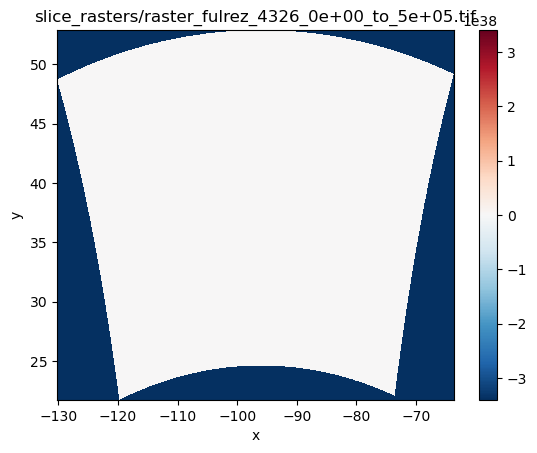

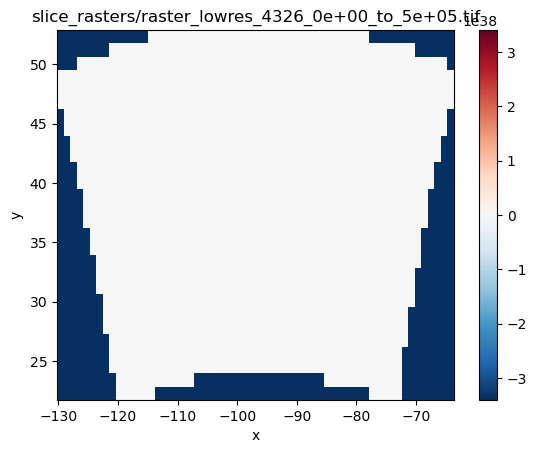

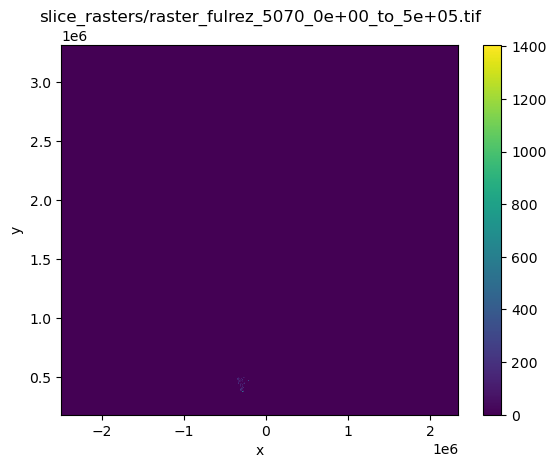

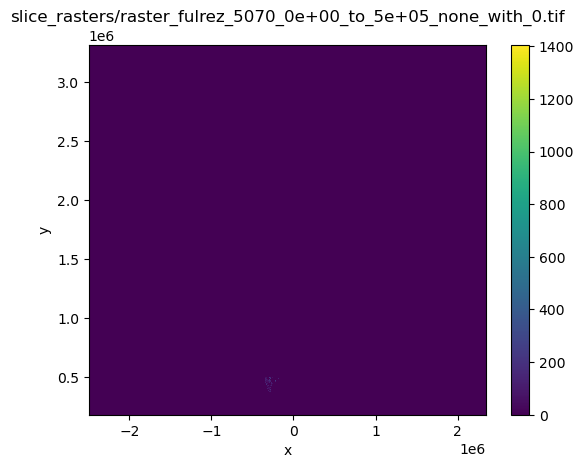

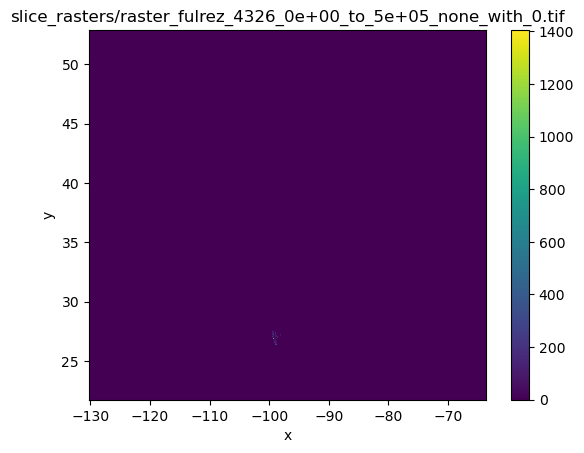

In [ ]:
# open file
paths = fulrez_4326_path, lowrez_4326_path,  input_tif_5070_path, tif_5070_path_none_with_0, fulrez_4326_path_none_with_0 #output_nc_path,

for path in paths:
    #open transformed slice
    xr_array = rioxarray.open_rasterio(path)
    plt.figure()
    xr_array.plot()
    plt.title(path)
    #xr_array = xr_array.where(xr_array < 0 , 0)#!= xr_array._FillValue)
    
    # #compute stats for slice
    # #TODO: I NEED TO FIGURE OUT HOW TO NAME MY DATA FRAME
    # stats = pd.DataFrame({
    # "Total_in_slice":int(xr_array.sum()),
    # "Lowest_lon":int(xr_array.x.min()),
    # "Highest_lon":int(xr_array.x.max()),
    # "Lowest_lat":int(xr_array.y.min()),
    # "Highest_lat":int(xr_array.y.max())
    # }, index = [0])
    
    # print(path)
    # display(stats)
    
    # #output stats
    # #TODO: I need to fix the naming of the output file
    # stats.to_csv(f"slice_stats/stats_{resolutions[0]}_{epsg_s[0]}_{slices[0]:.0e}_to_{slices[1]:.0e}.csv")
    
xr_array = rioxarray.open_rasterio(input_tif_5070_path)
xr_array = xr_array.where(xr_array != xr_array._FillValue)

# Next
- I need to figure out why my data is not being conserved and how to fix it

### Ideas to fix
- Could try to remove the large negative numbers that are being used as placeholders for geotif

<xarray.DataArray (band: 1, y: 3133, x: 4836)>
[15151188 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -2.493e+06 -2.492e+06 ... 2.341e+06 2.342e+06
  * y            (y) float64 3.31e+06 3.309e+06 ... 1.788e+05 1.778e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    _FillValue:          -3.4028235e+38
    scale_factor:        1.0
    add_offset:          0.0

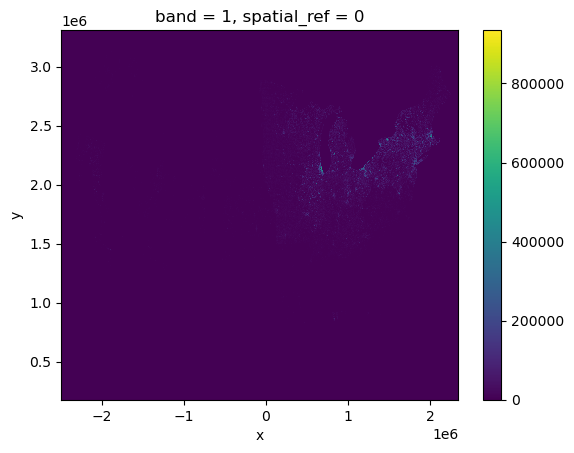

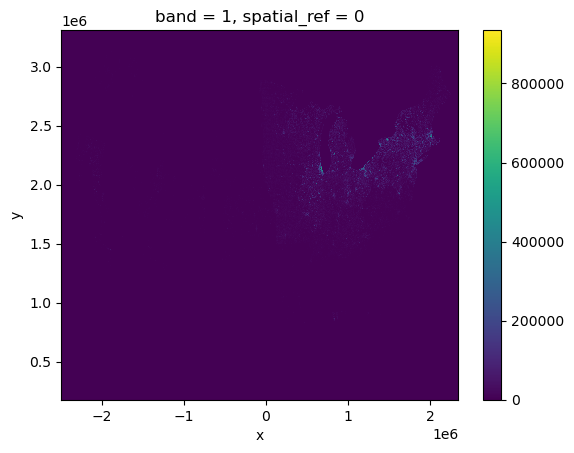

In [ ]:
from helper_functions import replace_none_with_0

input_tif_5070_path = r"input_data/1992_2015/1993.tif"

replace_none_with_0(input_file_path=input_tif_5070_path, output_file_path= r"intermediate_data/tif_5070_none_with_0.tif")

xr = rioxarray.open_rasterio(r"intermediate_data/tif_5070_none_with_0.tif")

display(xr)
plt.figure()
xr.plot()